In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
%matplotlib inline

In [2]:
rc("animation",html="jshtml")

In [3]:
hbar = 1
m = 1

In [4]:
def omega(k):
    """
    Define the dispersion relation (frequency as a function of wavenumber, or energy as a function of momentum).
    """
    return hbar*k**2/(2*m)

In [5]:
def wavepacket(x0,p0,sigma_p,t,p):
    """
    Return the momentum-space wave function, including time evolution, for a Gaussian wave packet.
    """
    return np.exp(-1j*p*x0/hbar)*np.exp(-(p-p0)**2/(4*sigma_p**2))*np.exp(-1j*omega(p/hbar)*t)

In [6]:
# Define the ranges and spacings for x and p
x = np.linspace(-20,20,num=2048)
p = np.fft.fftfreq(x.size,40/2048)*(2*np.pi)*hbar

In [20]:
class AnimatedPlot:
    """
    Helper class to handle creating and updating an animated plot
    """
    def __init__(self,x,yfunc,q0,cplx=False):
        self.xdata = x
        self.yfunc = yfunc
        self.fig = plt.figure()
        self.ax = self.fig.add_subplot()
        self.cplx = cplx
        if cplx:
            ydata = self.yfunc(q0)
            self.plt = self.ax.plot(self.xdata,np.real(ydata),self.xdata,np.imag(ydata))
        else:
            self.plt = self.ax.plot(self.xdata,self.yfunc(q0))
    
    def update(self,q):
        if self.cplx:
            ydata = self.yfunc(q)
            self.plt[0].set_data(self.xdata,np.real(ydata))
            self.plt[1].set_data(self.xdata,np.imag(ydata))
        else:
            self.plt[0].set_data(self.xdata,self.yfunc(q))
        return self.plt
    
    def animate(self,qrange,**kwargs):
        return animation.FuncAnimation(self.fig,self.update,frames=qrange,**kwargs)

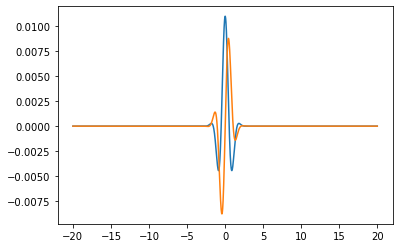

In [25]:
# Calculate psi as a function of time (leaving t undetermined for now).
# The main work is done by the inverse fft; the ifftshift adjusts for our non-standard, zero-centered x domain
psi = lambda t: np.fft.ifftshift(np.fft.ifft(wavepacket(0,3,1,t,p)))

aplt = AnimatedPlot(x,psi,0,cplx=True)
# aplt.ax.set_ylim(-0.025,0.025)

In [26]:
anim = aplt.animate(np.linspace(0,4,100),interval=50)
anim